<a href="https://colab.research.google.com/github/Alexiaran/traitement_images_contours/blob/main/detection_contours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

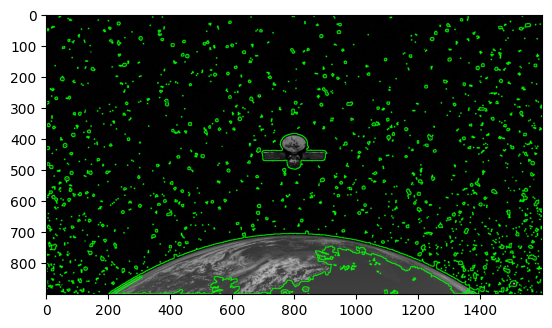

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Charger l'image
image = cv2.imread("/content/image1.jpg", cv2.IMREAD_GRAYSCALE)

# Appliquer un flou gaussien pour réduire le bruit
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Appliquer un seuillage adaptatif pour mieux séparer l'objet du fond
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Appliquer le détecteur de contours Canny
edges = cv2.Canny(thresh, 50, 150)

# Effectuer une fermeture morphologique pour combler les trous dans le contour
kernel = np.ones((5, 5), np.uint8)
closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# Trouver les contours
contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Vérifier si des contours ont été trouvés
if contours:

    # Convertir l'image en couleur pour dessiner les contours
    output = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # Dessiner le contour en vert
    cv2.drawContours(output, contours, -1, (0, 255, 0), 2)

    # Afficher l'image originale et l'image avec le contour détecté
    plt.imshow(output)

else:
    print("Aucun contour détecté.")


Rectangle : Position (1529, 898), Largeur: 3 px ou 0.09021097956087902 m, Hauteur: 2 px
Rectangle : Position (845, 898), Largeur: 3 px ou 0.09021097956087902 m, Hauteur: 2 px
Rectangle : Position (153, 898), Largeur: 3 px ou 0.09021097956087902 m, Hauteur: 2 px
Rectangle : Position (1511, 897), Largeur: 3 px ou 0.09021097956087902 m, Hauteur: 3 px
Rectangle : Position (559, 897), Largeur: 5 px ou 0.15035163260146503 m, Hauteur: 3 px
Rectangle : Position (101, 895), Largeur: 3 px ou 0.09021097956087902 m, Hauteur: 5 px
Rectangle : Position (1581, 894), Largeur: 1 px ou 0.030070326520293008 m, Hauteur: 1 px
Rectangle : Position (60, 894), Largeur: 3 px ou 0.09021097956087902 m, Hauteur: 3 px
Rectangle : Position (1596, 893), Largeur: 4 px ou 0.12028130608117203 m, Hauteur: 3 px
Rectangle : Position (1522, 893), Largeur: 3 px ou 0.09021097956087902 m, Hauteur: 2 px
Rectangle : Position (1583, 892), Largeur: 1 px ou 0.030070326520293008 m, Hauteur: 1 px
Rectangle : Position (1494, 892), La

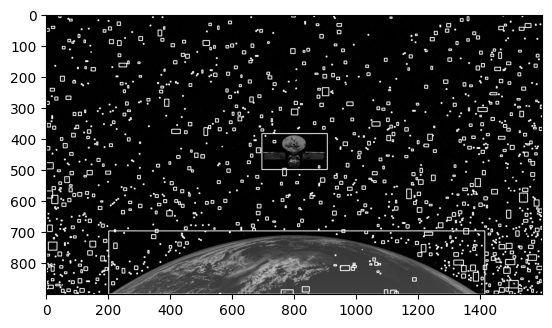

In [ ]:
rectangles_sizes = []
# Paramètres camera
distance_m = 50   # Distance de l'objet en mètres
FoV_deg = 60      #en degrés
resolution_x=1920
# Conversion des unités
FoV_rad = np.deg2rad(FoV_deg)  # Convertir le FoV en radians
# Largeur réelle en m
resolution_x_m = 2 * distance_m*np.tan(FoV_rad / 2)
size_pixel_m= resolution_x_m/resolution_x

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)  # Rectangle englobant
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 255, 255), 2) #rectangle en blanc
    # Ajouter ces informations à la liste
    rectangles_sizes.append({'rect': (x, y, w, h)})
    width_objet_m= (size_pixel_m)*w
    area= w*h
    print(f"Rectangle : Position ({x}, {y}), Largeur: {w} px ou {width_objet_m} m, Hauteur: {h} px")
# Afficher l'image avec les rectangles
plt.imshow(image,cmap="gray")

Rectangle : Position (202, 696), Largeur: 1213 px ou 36.47530606911542 m, Hauteur: 204 px
Rectangle : Position (696, 382), Largeur: 211 px ou 6.344838895781825 m, Hauteur: 116 px


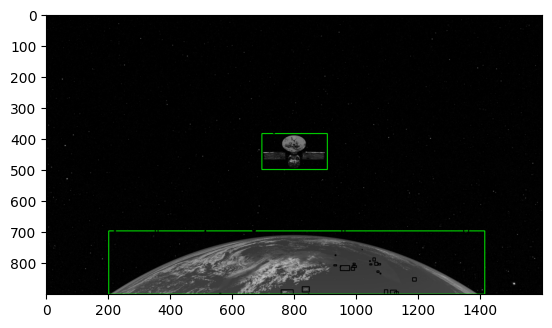

In [ ]:
# Filtrer et dessiner les contours correspondant aux objets d'intérêts si besoin


image_filtre = image.copy()
image_filtre = cv2.cvtColor(image_filtre, cv2.COLOR_GRAY2BGR)  # Convertir en couleur
rectangles_sizes = []
# Paramètres camera
distance_m = 50   # Distance de l'objet en mètres
FoV_deg = 60      # Champ de vision en degrés
resolution_x=1920
# Conversion des unités
FoV_rad = np.deg2rad(FoV_deg)  # Convertir le FoV en radians
# Largeur réelle en m
resolution_x_m = 2 * distance_m*np.tan(FoV_rad / 2)
size_pixel_m= resolution_x_m/resolution_x
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)  # Rectangle englobant
    if w >=50:  # Taille en pixels
        cv2.rectangle(image_filtre, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Dessiner le rectangle en vert
        width = w  # Largeur du rectangle en pixels
        height = h  # Hauteur du rectangle en pixels

        # Calculer l'aire de l'objet (en pixels carrés)
        area = w * h
        # Ajouter ces informations à la liste
        rectangles_sizes.append({'rect': (x, y, w, h), })
        width_objet_m= (size_pixel_m)*width
        print(f"Rectangle : Position ({x}, {y}), Largeur: {w} px ou {width_objet_m} m, Hauteur: {h} px")
    else:
        cv2.rectangle(image_filtre, (x, y), (x + w, y + h), (0, 0, 0), 2)  # Dessiner le rectangle en noir pour qu'on ne les voit plus

# Afficher l'image avec les contours filtrés
plt.imshow(cv2.cvtColor(image_filtre, cv2.COLOR_BGR2RGB))
plt.show()